<a href="https://colab.research.google.com/github/geovannathereza/PrevisaoFraude/blob/main/PrevisaoFraude.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Previsão de Fraude

A detecção e prevenção de fraudes é um dos principais desafios enfrentados por instituições financeiras e empresas de tecnologia. Com o aumento das transações digitais, identificar comportamentos suspeitos de forma automatizada tornou-se essencial para reduzir perdas financeiras e proteger os usuários. Este projeto tem como objetivo desenvolver um modelo de machine learning capaz de prever fraudes em transações com base em um conjunto de dados.

In [1]:
import warnings
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.options.display.float_format = '{:.2f}'.format

In [ ]:
df = pd.read_csv('dados_coletados10k.csv')

### 1. Análise Exploratória

Iniciaremos o projeto fazendo uma análise exploratória que é necessária para termos uma visão geral dos dados que serão trabalhados durante este notebook.

O conjunto de dados utilizados neste projeto contém 9517 linhas e 24 colunas

In [ ]:
df.shape

(9517, 24)

In [ ]:
df.head()

,Contrato,Idade,Sexo,Valor_Renda,UF_Cliente,Perc_Juros,Prazo_Emprestimo,Data_Contratacao,Prazo_Restante,VL_Emprestimo,VL_Emprestimo_ComJuros,QT_Total_Parcelas_Pagas,QT_Total_Parcelas_Pagas_EmDia,QT_Total_Parcelas_Pagas_EmAtraso,Qt_Renegociacao,Estado_Civil,Escolaridade,Possui_Patrimonio,VL_Patrimonio,QT_Parcelas_Atraso,QT_Dias_Atraso,Saldo_Devedor,Total_Pago,Possivel_Fraude
0,322068935715,43,M,5800.00,SP,23.00,200,2022-08-01,193,80000.00,92000.00,15,9,1,0,DIVORCIADO,Nenhum,N,0.00,0,NaN,91759.97,7717.08,Nao
1,322068936715,22,M,2000.00,MG,20.00,100,2022-08-01,89,50000.00,57500.00,10,10,0,0,SOLTEIRO(A),NaN,N,0.00,4,103.00,53981.18,6756.59,Nao
2,322068938715,35,M,4000.00,BA,18.00,100,2022-08-01,85,100000.00,115000.00,15,5,1,0,CASADO (A),NaN,N,0.00,0,NaN,101150.02,17929.06,Nao
3,322068939715,20,M,1800.00,MG,20.00,100,2022-08-01,89,30000.00,34500.00,1,1,0,0,SOLTEIRO(A),NaN,N,0.00,13,376.00,36208.10,369.10,Sim
4,322068940715,53,M,2800.00,MG,20.00,100,2022-08-01,87,60000.00,69000.00,16,16,0,0,CASADO (A),NaN,N,0.00,0,NaN,60984.00,11845.24,Nao


Avaliando o período dos dados coletados

In [ ]:
inicio = pd.to_datetime(df['Data_Contratacao']).dt.date.min()
fim = pd.to_datetime(df['Data_Contratacao']).dt.date.max()
print('Período dos dados - De:', inicio, 'até:', fim)

Período dos dados - De: 2022-07-04 até: 2022-12-20


Verificando se há valores nulos (dados missing)

In [ ]:
df.isnull().sum()

,0
Contrato,0
Idade,0
Sexo,0
Valor_Renda,0
UF_Cliente,0
Perc_Juros,0
Prazo_Emprestimo,0
Data_Contratacao,0
Prazo_Restante,0
VL_Emprestimo,0


Informações básicas sobre tipos de variáveis de cada coluna



In [ ]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9517 entries, 0 to 9516
Data columns (total 24 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Contrato                          9517 non-null   int64  
 1   Idade                             9517 non-null   int64  
 2   Sexo                              9517 non-null   object 
 3   Valor_Renda                       9517 non-null   float64
 4   UF_Cliente                        9517 non-null   object 
 5   Perc_Juros                        9517 non-null   float64
 6   Prazo_Emprestimo                  9517 non-null   int64  
 7   Data_Contratacao                  9517 non-null   object 
 8   Prazo_Restante                    9517 non-null   int64  
 9   VL_Emprestimo                     9517 non-null   float64
 10  VL_Emprestimo_ComJuros            9517 non-null   float64
 11  QT_Total_Parcelas_Pagas           9517 non-null   int64  
 12  QT_Tot

Total de valores únicos de cada variável
- A variável CONTRATO é um valor único para cada registro, pois refere-se ao Contrato do Cliente, não utilizaremos essa variável no futuro.

In [ ]:
valores_unicos = []
for i in df.columns[0:24].tolist():
  print(i, ':', len(df[i].astype(str).value_counts()))
  valores_unicos.append(len(df[i].astype(str).value_counts()))

Contrato : 9517
Idade : 74
Sexo : 2
Valor_Renda : 855
UF_Cliente : 27
Perc_Juros : 21
Prazo_Emprestimo : 36
Data_Contratacao : 110
Prazo_Restante : 79
VL_Emprestimo : 61
VL_Emprestimo_ComJuros : 61
QT_Total_Parcelas_Pagas : 24
QT_Total_Parcelas_Pagas_EmDia : 24
QT_Total_Parcelas_Pagas_EmAtraso : 15
Qt_Renegociacao : 10
Estado_Civil : 6
Escolaridade : 6
Possui_Patrimonio : 2
VL_Patrimonio : 3
QT_Parcelas_Atraso : 16
QT_Dias_Atraso : 16
Saldo_Devedor : 7654
Total_Pago : 7022
Possivel_Fraude : 2


Aqui podemos visualizar algumas medidas estatisticas.

In [ ]:
df.describe()

,Contrato,Idade,Valor_Renda,Perc_Juros,Prazo_Emprestimo,Prazo_Restante,VL_Emprestimo,VL_Emprestimo_ComJuros,QT_Total_Parcelas_Pagas,QT_Total_Parcelas_Pagas_EmDia,QT_Total_Parcelas_Pagas_EmAtraso,Qt_Renegociacao,VL_Patrimonio,QT_Parcelas_Atraso,QT_Dias_Atraso,Saldo_Devedor,Total_Pago
count,9517.00,9517.00,9517.00,9517.00,9517.00,9517.00,9517.00,9517.00,9517.00,9517.00,9517.00,9517.00,9517.00,9517.00,5923.00,9517.00,9517.00
mean,322078158460.93,38.74,8325.40,19.65,107.43,104.58,81881.89,94164.17,7.89,4.11,1.60,1.24,10.93,5.35,249.79,90560.27,8166.21
std,5434160.86,12.67,121862.06,3.82,62.49,68.57,94138.06,108258.77,5.17,4.04,2.31,1.17,1025.26,5.32,123.22,111050.54,16697.76
min,322068935715.00,6.00,450.00,7.00,15.00,0.00,3500.00,4025.00,0.00,0.00,0.00,0.00,0.00,0.00,11.00,0.00,0.00
25%,322073331715.00,29.00,2300.00,18.00,60.00,51.00,20000.00,23000.00,2.00,1.00,0.00,0.00,0.00,0.00,162.00,18546.85,1202.04
50%,322078461715.00,37.00,3400.00,20.00,80.00,80.00,50000.00,57500.00,9.00,2.00,1.00,1.00,0.00,4.00,284.00,45375.30,3949.91
75%,322082622715.00,46.00,5000.00,22.00,190.00,185.00,100000.00,115000.00,13.00,6.00,2.00,2.00,0.00,11.00,344.00,119721.25,8302.01
max,322087622715.00,91.00,8000080.00,28.00,240.00,227.00,500000.00,575000.00,35.00,35.00,14.00,9.00,100000.00,15.00,435.00,625000.00,396385.00


Avaliando o maior e menor valor da variavel Valor_Renda


In [ ]:
print('Maior renda:', df['Valor_Renda'].max())
print('Menor renda:', df['Valor_Renda'].min())

Maior renda: 8000080.0
Menor renda: 450.0


Avaliando o maior e menor valor da variavel QT_Dias_Atraso

In [ ]:
print('Maior quantidade de dias atraso:', df['QT_Dias_Atraso'].max())
print('Menor quantidade de dias atraso:', df['QT_Dias_Atraso'].min())

Maior quantidade de dias atraso: 435.0
Menor quantidade de dias atraso: 11.0


Avaliando o maior e menor valor da variavel Prazo_Restante

In [ ]:
print('Maior quantidade de dias restantes:', df['Prazo_Restante'].max())
print('Menor quantidade de dias restantes:', df['Prazo_Restante'].min())

Maior quantidade de dias restantes: 227
Menor quantidade de dias restantes: 0


Quantidade de dias em atraso

In [ ]:
df.groupby(['QT_Dias_Atraso']).size()

,0
QT_Dias_Atraso,
11.00,532
41.00,255
71.00,190
103.00,205
133.00,176
162.00,206
194.00,241
225.00,352
251.00,471


O Prazo do emprestimo em meses

In [ ]:
df.groupby(['Prazo_Emprestimo']).size()

,0
Prazo_Emprestimo,
15,4
18,4
19,5
20,146
25,183
30,272
34,1
35,81
36,306


O Prazo do restante em meses

In [ ]:
df.groupby(['Prazo_Restante']).size()

Sexo dos clientes

In [ ]:
df.groupby(['Sexo']).size()

,0
Sexo,
F,3811
M,5706


Estado de cada cliente



In [ ]:
df.groupby(['UF_Cliente']).size()

,0
UF_Cliente,
AC,1
AL,79
AM,2
AP,5
BA,883
CE,248
DF,46
ES,49
GO,485


Idade dos clientes


In [ ]:
df.groupby(['Idade']).size()

,0
Idade,
6,1
17,4
18,6
19,109
20,207
21,193
22,173
23,234
24,251


Estado civil dos clientes



In [ ]:
df.groupby(['Estado_Civil']).size()

,0
Estado_Civil,
CASADO (A),3027
DIVORCIADO,481
OUTRO,652
SOLTEIRO(A),5087
UNIÃO ESTAVEL,130
VIÚVO(A),140


Grau completo de escolaridade de cada cliente



In [ ]:
df.groupby(['Escolaridade']).size()

,0
Escolaridade,
Ensino Fundamental,18
Ensino Médio,129
Ensino Superior,74
Nenhum,2184
Pós Graduação / Mestrado / Doutorado,7


Patrimônio dos clientes


In [ ]:
df.groupby(['Possui_Patrimonio']).size()

,0
Possui_Patrimonio,
N,9452
S,65


Valor do patrimônio dos clientes

In [ ]:
df.groupby(['VL_Patrimonio']).size()

,0
VL_Patrimonio,
0.00,9512
1000.00,4
100000.00,1


Variável target - Indica a possibilidade de fraude ou não-fraude



In [ ]:
df.groupby(['Possivel_Fraude']).size()

,0
Possivel_Fraude,
Nao,5035
Sim,4482


### 2. Pré processamento/Engenharia de Atributos

Tratando os dados que identificamos que precisavam de ajustes na análise acima

Ajustando ESTADO_CIVIL

In [ ]:
df['Estado_Civil'] = df['Estado_Civil'].replace(['NENHUM'], 'OUTRO')
df['Estado_Civil'] = df['Estado_Civil'].replace(['UNIÃO ESTAVEL'], 'CASADO (A)')

Criando a coluna Faixa_Etaria a partir da coluna Idade

In [ ]:
bins = [0, 21, 30, 40, 50, 60, 100]
labels = ['0-21', '22-30', '31-40', '41-50', '51-60', '60+']
df['Faixa_Etaria'] = pd.cut(df['Idade'], bins=bins, labels=labels)
df.groupby(['Faixa_Etaria']).size()

,0
Faixa_Etaria,
0-21,520
22-30,2346
31-40,2835
41-50,2132
51-60,1071
60+,613


Criando a coluna Faixa_Salarial a partir da coluna Valor_Renda



In [ ]:
bins = [-100, 1000, 2000, 3000, 5000, 10000, 20000, 30000, 9000000000]
labels = ['Até 1k', 'De 1k até 2k', 'De 2k até 3k', 'De 3k até 5k', 'De 5k até 10k',
          'De 10k até 20k', 'De 20k até 30k', 'Mais de 50k']
df['Faixa_Salarial'] = pd.cut(df['Valor_Renda'], bins=bins, labels=labels)
df.groupby(['Faixa_Salarial']).size()


,0
Faixa_Salarial,
Até 1k,19
De 1k até 2k,2012
De 2k até 3k,2522
De 3k até 5k,2646
De 5k até 10k,1574
De 10k até 20k,488
De 20k até 30k,137
Mais de 50k,119


Tratando os valores nulos da coluna QT_Dias_Atraso, preenchemos os valores nulos usando a mediana dos dados e em seguida criamos a coluna Faixa_Dias_Atraso a partir da coluna QT_Dias_Atraso


In [ ]:
df['QT_Dias_Atraso'].median()

284.0

In [ ]:
df['QT_Dias_Atraso'] = df['QT_Dias_Atraso'].fillna(df['QT_Dias_Atraso'].median())

In [ ]:
bins = [-100, 30, 60, 90, 180, 240, 360, 500]
labels = ['Até 30 dias', 'De 31 até 60', 'De 61 até 90', 'De 91 até 180', 'De 181 até 240', 'De 241 até 360', 'Mais de 360']
df['Faixa_Dias_Atraso'] = pd.cut(df['QT_Dias_Atraso'], bins=bins, labels=labels)
df.groupby(['Faixa_Dias_Atraso']).size()

,0
Faixa_Dias_Atraso,
Até 30 dias,532
De 31 até 60,255
De 61 até 90,190
De 91 até 180,587
De 181 até 240,593
De 241 até 360,6259
Mais de 360,1101


Criando a coluna Faixa_Prazo_Emprestimo a partir da coluna Prazo_Emprestimo

In [ ]:
bins = [0, 60, 120, 200, 720]
labels = ['Até 60 meses', 'De 61 até 120 meses', 'De 121 até 200 meses', 'Acima de 200 meses']
df['Faixa_Prazo_Emprestimo'] = pd.cut(df['Prazo_Emprestimo'], bins=bins, labels=labels)
df.groupby(['Faixa_Prazo_Emprestimo']).size()

,0
Faixa_Prazo_Emprestimo,
Até 60 meses,2955
De 61 até 120 meses,3567
De 121 até 200 meses,2814
Acima de 200 meses,181


Criando a coluna Faixa_Prazo_Restante a partir da coluna Prazo_Restante

In [ ]:
bins = [-1, 60, 120, 200, 500]
labels = ['Até 60 meses', 'De 61 até 120 meses', 'De 121 até 200 meses', 'Acima de 200 meses']
df['Faixa_Prazo_Restante'] = pd.cut(df['Prazo_Restante'], bins=bins, labels=labels)
df.groupby(['Faixa_Prazo_Restante']).size()

,0
Faixa_Prazo_Restante,
Até 60 meses,2742
De 61 até 120 meses,3679
De 121 até 200 meses,2026
Acima de 200 meses,1070


Após os ajustes vamos visualizar de forma gráfica para avaliarmos melhor

<Axes: title={'center': 'Sexo'}, xlabel='Sexo'>

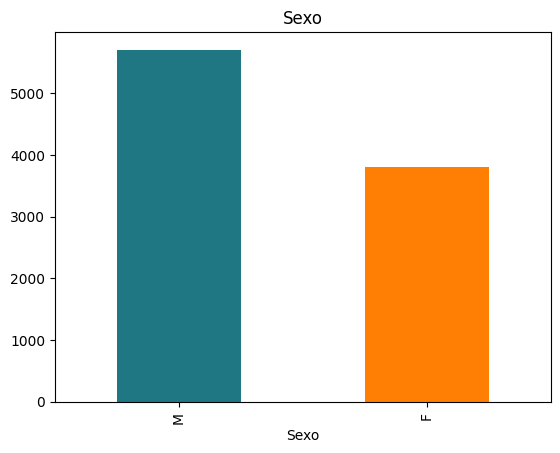

In [ ]:
df.Sexo.value_counts().plot(kind='bar', title='Sexo', color= ['#1F7784', '#FF7F04'])

<Axes: title={'center': 'UF_Cliente'}, xlabel='UF_Cliente'>

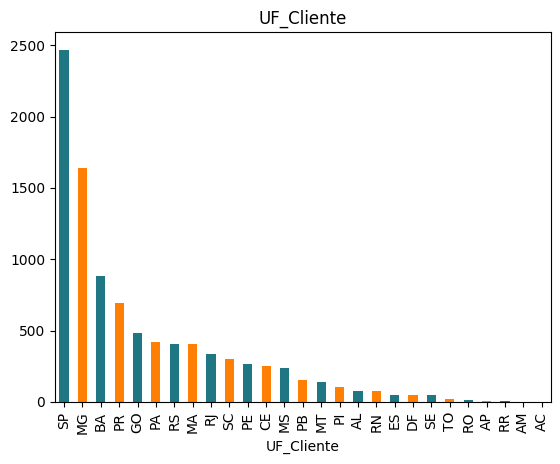

In [ ]:
df.UF_Cliente.value_counts().plot(kind='bar', title='UF_Cliente', color= ['#1F7784', '#FF7F04'])

<Axes: title={'center': 'Faixa_Prazo_Emprestimo'}, xlabel='Faixa_Prazo_Emprestimo'>

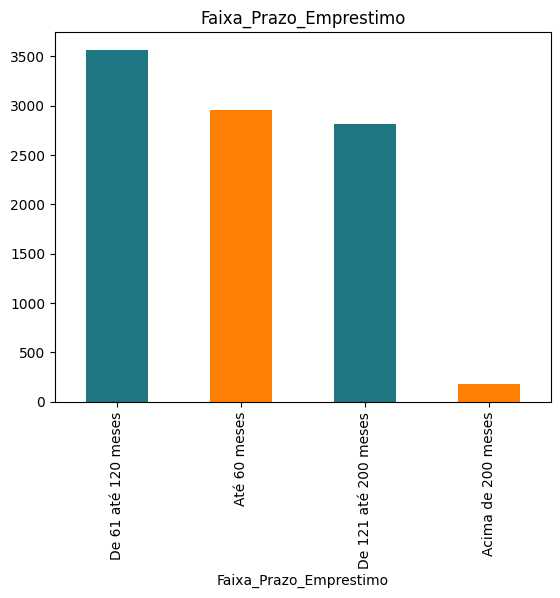

In [ ]:
df.Faixa_Prazo_Emprestimo.value_counts().plot(kind='bar', title='Faixa_Prazo_Emprestimo', color= ['#1F7784', '#FF7F04'])

<Axes: title={'center': 'Faixa_Prazo_Restante'}, xlabel='Faixa_Prazo_Restante'>

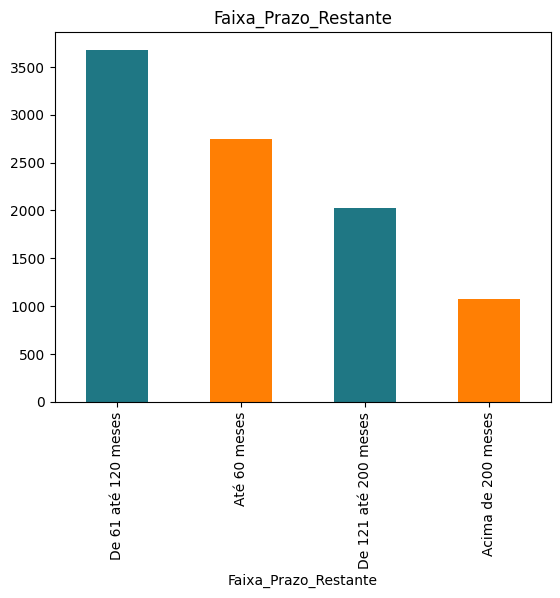

In [ ]:
df.Faixa_Prazo_Restante.value_counts().plot(kind='bar', title='Faixa_Prazo_Restante', color= ['#1F7784', '#FF7F04'])

<Axes: title={'center': 'Estado_Civil'}, xlabel='Estado_Civil'>

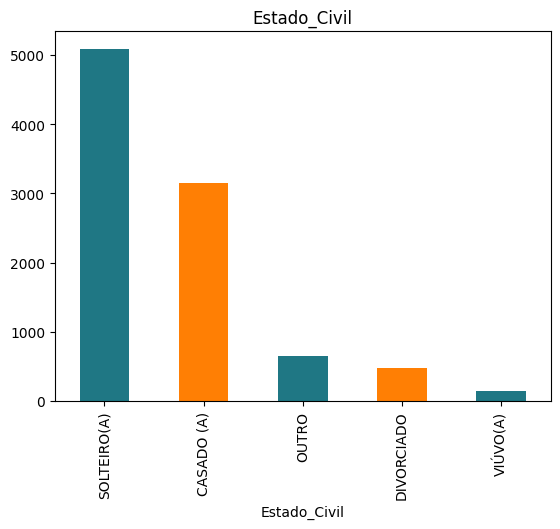

In [ ]:
df.Estado_Civil.value_counts().plot(kind='bar', title='Estado_Civil', color= ['#1F7784', '#FF7F04'])

<Axes: title={'center': 'Escolaridade'}, xlabel='Escolaridade'>

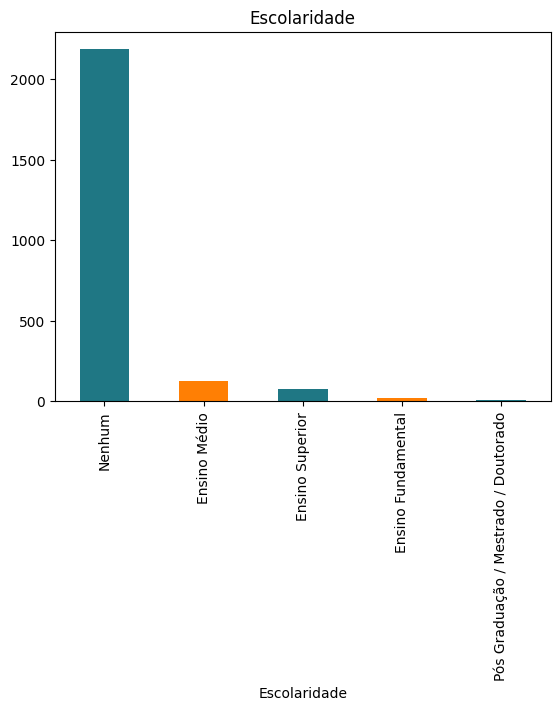

In [ ]:
df.Escolaridade.value_counts().plot(kind='bar', title='Escolaridade', color= ['#1F7784', '#FF7F04'])

<Axes: title={'center': 'Faixa_Dias_Atraso'}, xlabel='Faixa_Dias_Atraso'>

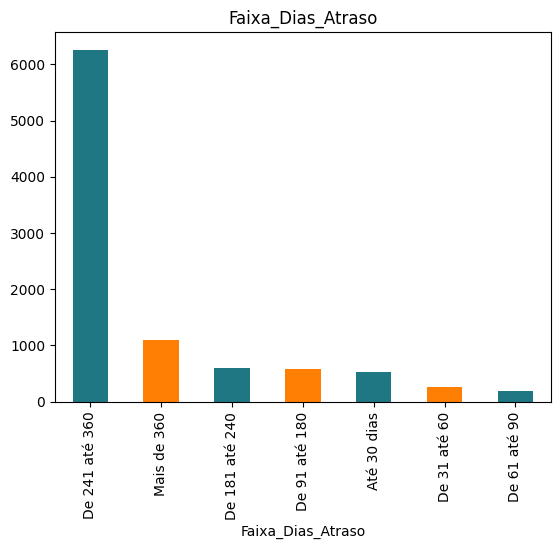

In [ ]:
df.Faixa_Dias_Atraso.value_counts().plot(kind='bar', title='Faixa_Dias_Atraso', color= ['#1F7784', '#FF7F04'])

<Axes: title={'center': 'Faixa_Salarial'}, xlabel='Faixa_Salarial'>

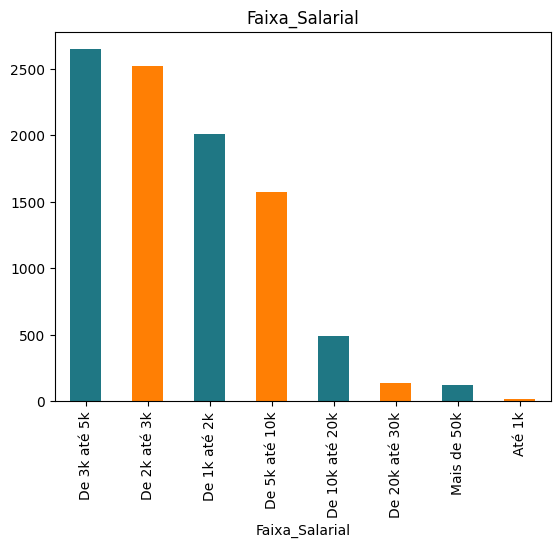

In [ ]:
df.Faixa_Salarial.value_counts().plot(kind='bar', title='Faixa_Salarial', color= ['#1F7784', '#FF7F04'])

<Axes: title={'center': 'Possui_Patrimonio'}, xlabel='Possui_Patrimonio'>

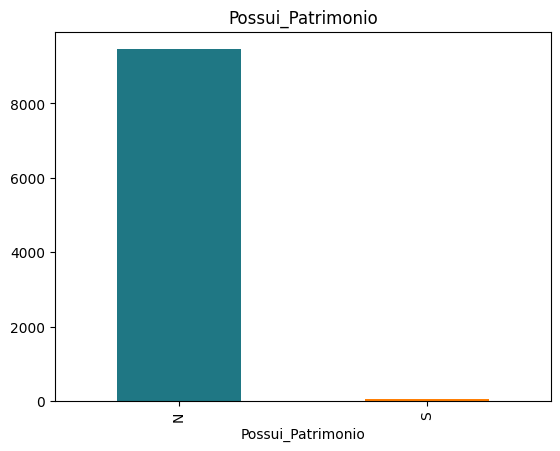

In [ ]:
df.Possui_Patrimonio.value_counts().plot(kind='bar', title='Possui_Patrimonio', color= ['#1F7784', '#FF7F04'])

<Axes: title={'center': 'Faixa_Etaria'}, xlabel='Faixa_Etaria'>

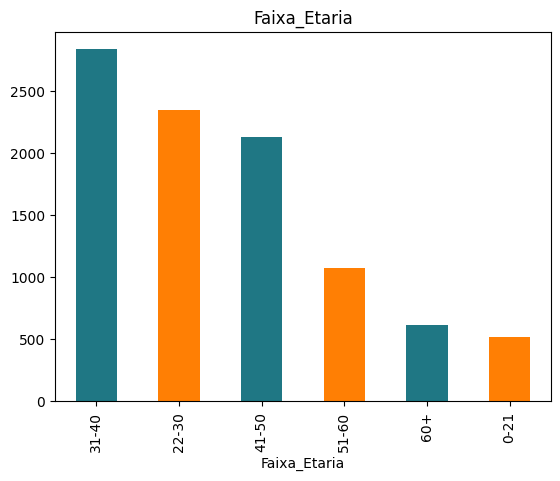

In [ ]:
df.Faixa_Etaria.value_counts().plot(kind='bar', title='Faixa_Etaria', color= ['#1F7784', '#FF7F04'])

Analisando como a variavel alvo target distribuida, observamos que há muito mais cotas como NÃO POSSÍVEL FRAUDE, então posteriormente, precisaremos balancear o dataset.

<Axes: title={'center': 'Possivel_Fraude'}, xlabel='Possivel_Fraude'>

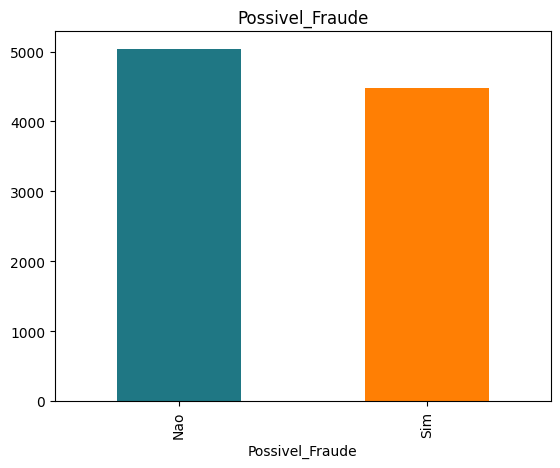

In [ ]:
df.Possivel_Fraude.value_counts().plot(kind='bar', title='Possivel_Fraude', color= ['#1F7784', '#FF7F04'])


Visualizando o dataset após a engenharia de atributos

In [ ]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9517 entries, 0 to 9516
Data columns (total 29 columns):
 #   Column                            Non-Null Count  Dtype   
---  ------                            --------------  -----   
 0   Contrato                          9517 non-null   int64   
 1   Idade                             9517 non-null   int64   
 2   Sexo                              9517 non-null   object  
 3   Valor_Renda                       9517 non-null   float64 
 4   UF_Cliente                        9517 non-null   object  
 5   Perc_Juros                        9517 non-null   float64 
 6   Prazo_Emprestimo                  9517 non-null   int64   
 7   Data_Contratacao                  9517 non-null   object  
 8   Prazo_Restante                    9517 non-null   int64   
 9   VL_Emprestimo                     9517 non-null   float64 
 10  VL_Emprestimo_ComJuros            9517 non-null   float64 
 11  QT_Total_Parcelas_Pagas           9517 non-null   int64 

Agora iremos selecionar quais colunas iremos utilizar e quais iremos descartar

Após a nossa primeira análise foi possível perceber que algumas colunas não são tão relevantes, como por exemplo:

- Contrato: Essa variável é a identificação de cada cliente
- Data_Contratacao, VL_Patrimonio, Possui_Patrimonio, Escolaridade, Idade: Essas não irão ter relevancia no modelo
- Valor_Renda, Prazo_Emprestimo, QT_Dias_Atraso, Prazo_Restante: Essas variáveis já transformamos em categoria.

In [ ]:
df.columns

Index(['Contrato', 'Idade', 'Sexo', 'Valor_Renda', 'UF_Cliente', 'Perc_Juros',
       'Prazo_Emprestimo', 'Data_Contratacao', 'Prazo_Restante',
       'VL_Emprestimo', 'VL_Emprestimo_ComJuros', 'QT_Total_Parcelas_Pagas',
       'QT_Total_Parcelas_Pagas_EmDia', 'QT_Total_Parcelas_Pagas_EmAtraso',
       'Qt_Renegociacao', 'Estado_Civil', 'Escolaridade', 'Possui_Patrimonio',
       'VL_Patrimonio', 'QT_Parcelas_Atraso', 'QT_Dias_Atraso',
       'Saldo_Devedor', 'Total_Pago', 'Possivel_Fraude', 'Faixa_Etaria',
       'Faixa_Salarial', 'Faixa_Dias_Atraso', 'Faixa_Prazo_Emprestimo',
       'Faixa_Prazo_Restante'],
      dtype='object')

In [ ]:
columns = ['Sexo', 'UF_Cliente', 'Perc_Juros', 'VL_Emprestimo', 'VL_Emprestimo_ComJuros', 'QT_Total_Parcelas_Pagas',
       'QT_Total_Parcelas_Pagas_EmDia', 'QT_Total_Parcelas_Pagas_EmAtraso', 'Qt_Renegociacao', 'Estado_Civil',
       'QT_Parcelas_Atraso', 'Saldo_Devedor', 'Total_Pago', 'Possivel_Fraude', 'Faixa_Etaria', 'Faixa_Salarial',
       'Faixa_Dias_Atraso', 'Faixa_Prazo_Emprestimo', 'Faixa_Prazo_Restante']

df2 = pd.DataFrame(df, columns=columns)

In [ ]:
df2.shape

(9517, 19)

In [ ]:
df2.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9517 entries, 0 to 9516
Data columns (total 19 columns):
 #   Column                            Non-Null Count  Dtype   
---  ------                            --------------  -----   
 0   Sexo                              9517 non-null   object  
 1   UF_Cliente                        9517 non-null   object  
 2   Perc_Juros                        9517 non-null   float64 
 3   VL_Emprestimo                     9517 non-null   float64 
 4   VL_Emprestimo_ComJuros            9517 non-null   float64 
 5   QT_Total_Parcelas_Pagas           9517 non-null   int64   
 6   QT_Total_Parcelas_Pagas_EmDia     9517 non-null   int64   
 7   QT_Total_Parcelas_Pagas_EmAtraso  9517 non-null   int64   
 8   Qt_Renegociacao                   9517 non-null   int64   
 9   Estado_Civil                      9517 non-null   object  
 10  QT_Parcelas_Atraso                9517 non-null   int64   
 11  Saldo_Devedor                     9517 non-null   float6

In [ ]:
df2.isnull().sum()

,0
Sexo,0
UF_Cliente,0
Perc_Juros,0
VL_Emprestimo,0
VL_Emprestimo_ComJuros,0
QT_Total_Parcelas_Pagas,0
QT_Total_Parcelas_Pagas_EmDia,0
QT_Total_Parcelas_Pagas_EmAtraso,0
Qt_Renegociacao,0
Estado_Civil,0


### 3. Analise Exploratória em Variáveis Categóricas

Nesta analise temos 2 objetivos:
- Entender como a variável alvo (POSSIVEL_FRAUDE) está relacionada com as outras variáveis.
- Avaliar as variáveis categóricas para conhecimento dos dados e descartar variáveis que não fazem sentido.

In [ ]:
plt.rcParams['figure.figsize'] = [10, 4]
plt.rcParams['figure.autolayout'] = True

Podemos constatar na analise que não há discrepancias nestas variaveis

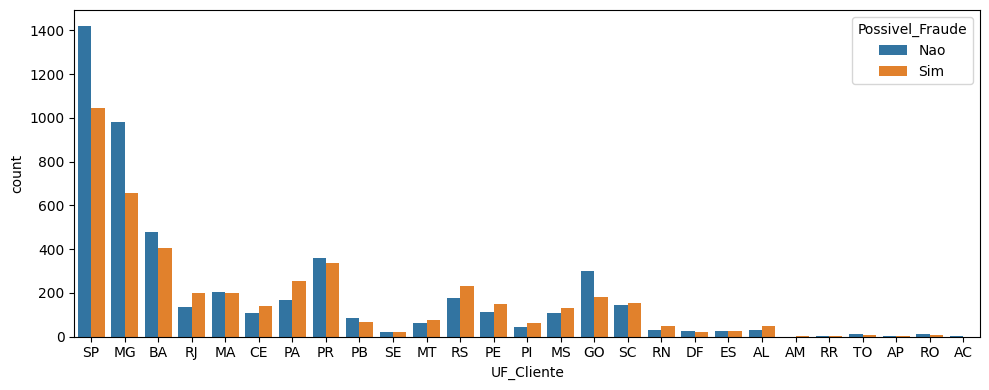

In [ ]:
sns.countplot(data=df2, x='UF_Cliente', hue='Possivel_Fraude')
plt.show()

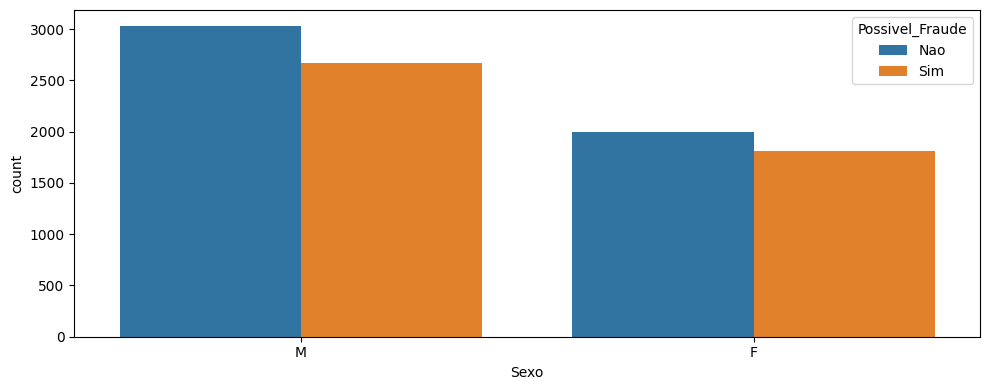

In [ ]:
sns.countplot(data=df2, x='Sexo', hue='Possivel_Fraude')
plt.show()

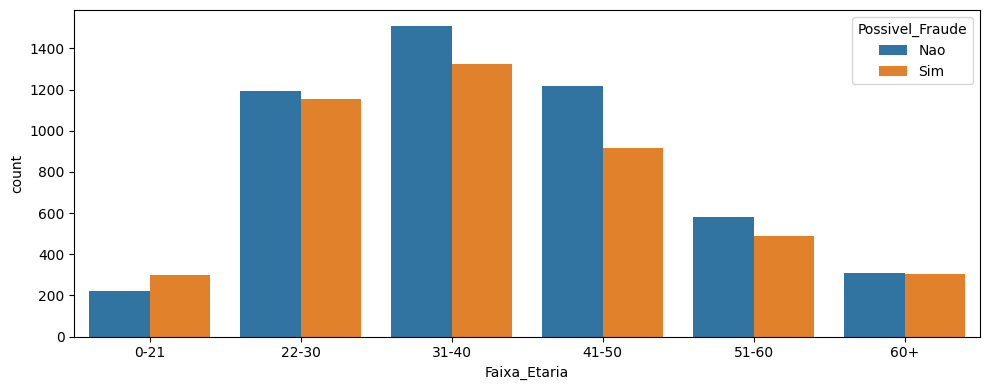

In [ ]:
sns.countplot(data=df2, x='Faixa_Etaria', hue='Possivel_Fraude')
plt.show()

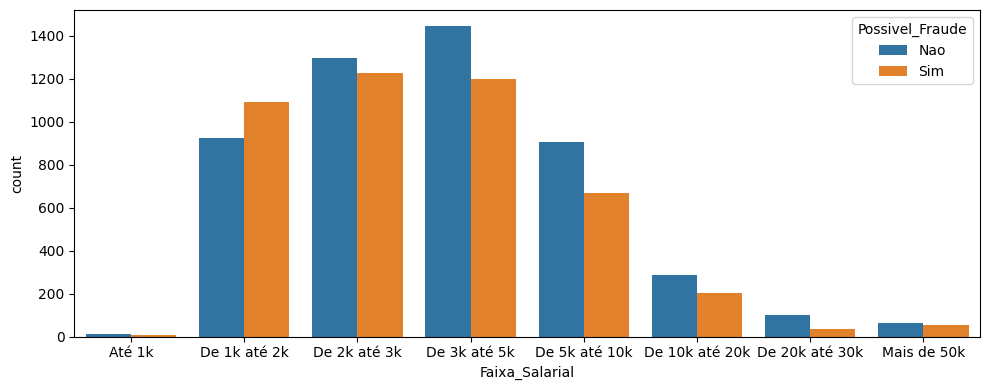

In [ ]:
sns.countplot(data=df2, x='Faixa_Salarial', hue='Possivel_Fraude')
plt.show()

Como existem muitos casos de ESTADO CIVIL diferente de Casado e Solteiro, posteriormente faremos um tratamento para que todos os casos que não forem Casado e Solteiro, sejam considerado como OUTROS. Dessa forma teremos somente 3 categorias e os dados ficarão balanceados.

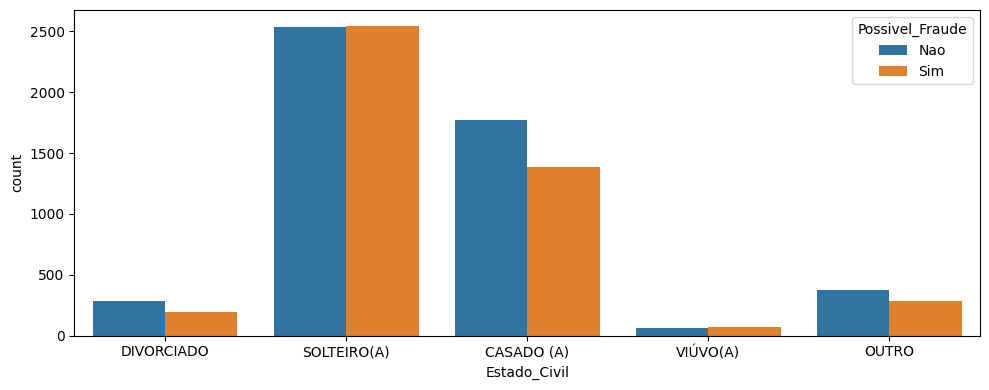

In [ ]:
sns.countplot(data=df2, x='Estado_Civil', hue='Possivel_Fraude')
plt.show()

É possível observar o volume de cotas que geraram prejuízo na arrecadação de taxa de administracao essa variável vamos manter no modelo e avaliar mais tarde



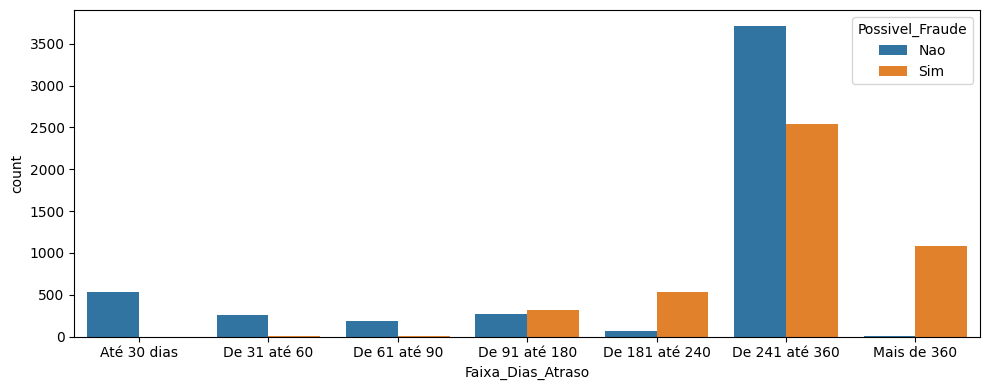

In [ ]:
sns.countplot(data=df2, x='Faixa_Dias_Atraso', hue='Possivel_Fraude')
plt.show()

Aqui podemos observar que não há discrepancias nestas variaveis.

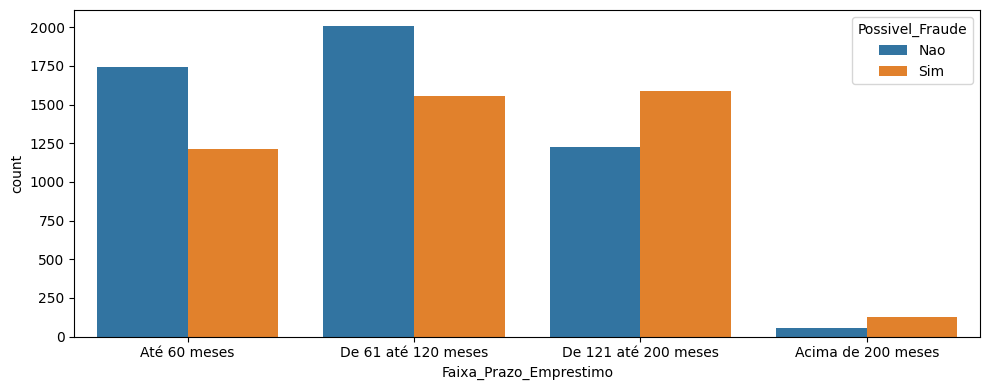

In [ ]:
sns.countplot(data=df2, x='Faixa_Prazo_Emprestimo', hue='Possivel_Fraude')
plt.show()

Podemos observar que esta variável está muito desbalanceada, logo iremos arrumar isto.

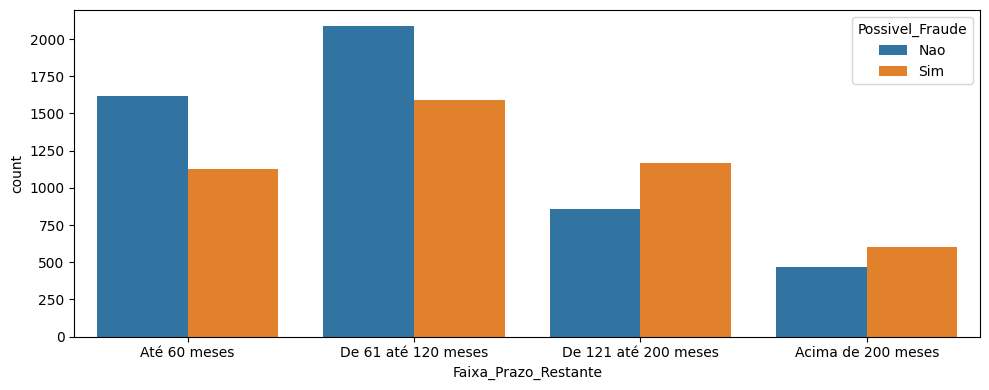

In [ ]:
sns.countplot(data=df2, x='Faixa_Prazo_Restante', hue='Possivel_Fraude')
plt.show()

In [ ]:
df2.describe()

,Perc_Juros,VL_Emprestimo,VL_Emprestimo_ComJuros,QT_Total_Parcelas_Pagas,QT_Total_Parcelas_Pagas_EmDia,QT_Total_Parcelas_Pagas_EmAtraso,Qt_Renegociacao,QT_Parcelas_Atraso,Saldo_Devedor,Total_Pago
count,9517.00,9517.00,9517.00,9517.00,9517.00,9517.00,9517.00,9517.00,9517.00,9517.00
mean,19.65,81881.89,94164.17,7.89,4.11,1.60,1.24,5.35,90560.27,8166.21
std,3.82,94138.06,108258.77,5.17,4.04,2.31,1.17,5.32,111050.54,16697.76
min,7.00,3500.00,4025.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,18.00,20000.00,23000.00,2.00,1.00,0.00,0.00,0.00,18546.85,1202.04
50%,20.00,50000.00,57500.00,9.00,2.00,1.00,1.00,4.00,45375.30,3949.91
75%,22.00,100000.00,115000.00,13.00,6.00,2.00,2.00,11.00,119721.25,8302.01
max,28.00,500000.00,575000.00,35.00,35.00,14.00,9.00,15.00,625000.00,396385.00


Total de valores únicos das variáveis do dataset



In [ ]:
valores_unicos = []
for i in df2.columns[0:19].tolist():
  print(i, ':', len(df2[i].astype(str).value_counts()))
  valores_unicos.append(len(df2[i].astype(str).value_counts()))

Sexo : 2
UF_Cliente : 27
Perc_Juros : 21
VL_Emprestimo : 61
VL_Emprestimo_ComJuros : 61
QT_Total_Parcelas_Pagas : 24
QT_Total_Parcelas_Pagas_EmDia : 24
QT_Total_Parcelas_Pagas_EmAtraso : 15
Qt_Renegociacao : 10
Estado_Civil : 5
QT_Parcelas_Atraso : 16
Saldo_Devedor : 7654
Total_Pago : 7022
Possivel_Fraude : 2
Faixa_Etaria : 6
Faixa_Salarial : 8
Faixa_Dias_Atraso : 7
Faixa_Prazo_Emprestimo : 4
Faixa_Prazo_Restante : 4


### 4. Analise Exploratória em Variáveis Numéricas

Nesta analise temos diversos objetivos:
- Conhecer as variáveis.
- Realizar uma analise estatistica nas variáveis para futuros tratamentos. Iremos avaliar média, mediana, moda, desvio padrão
correlações, outliers, distribuição dos dados, etc.  

Carregamos variáveis para o plot

In [ ]:
variaveis_numericas = []
for i in df2.columns[0:19].tolist():
  if df2.dtypes[i] == 'int64' or df2.dtypes[i] == 'float64':
    variaveis_numericas.append(i)

Visualizamos as variáveis numéricas

In [ ]:
variaveis_numericas

['Perc_Juros',
 'VL_Emprestimo',
 'VL_Emprestimo_ComJuros',
 'QT_Total_Parcelas_Pagas',
 'QT_Total_Parcelas_Pagas_EmDia',
 'QT_Total_Parcelas_Pagas_EmAtraso',
 'Qt_Renegociacao',
 'QT_Parcelas_Atraso',
 'Saldo_Devedor',
 'Total_Pago']

Quantidade de variaveis



In [ ]:
len(variaveis_numericas)

10

 Nos boxplots abaixo, vemos que as variáveis númericas apresentam uma grande quantidade de "possíveis" outliers, então iremos avaliar cada uma dessas variaveis dentro do contexto dos dados para saber se realmente iremos trata-las como outlier.

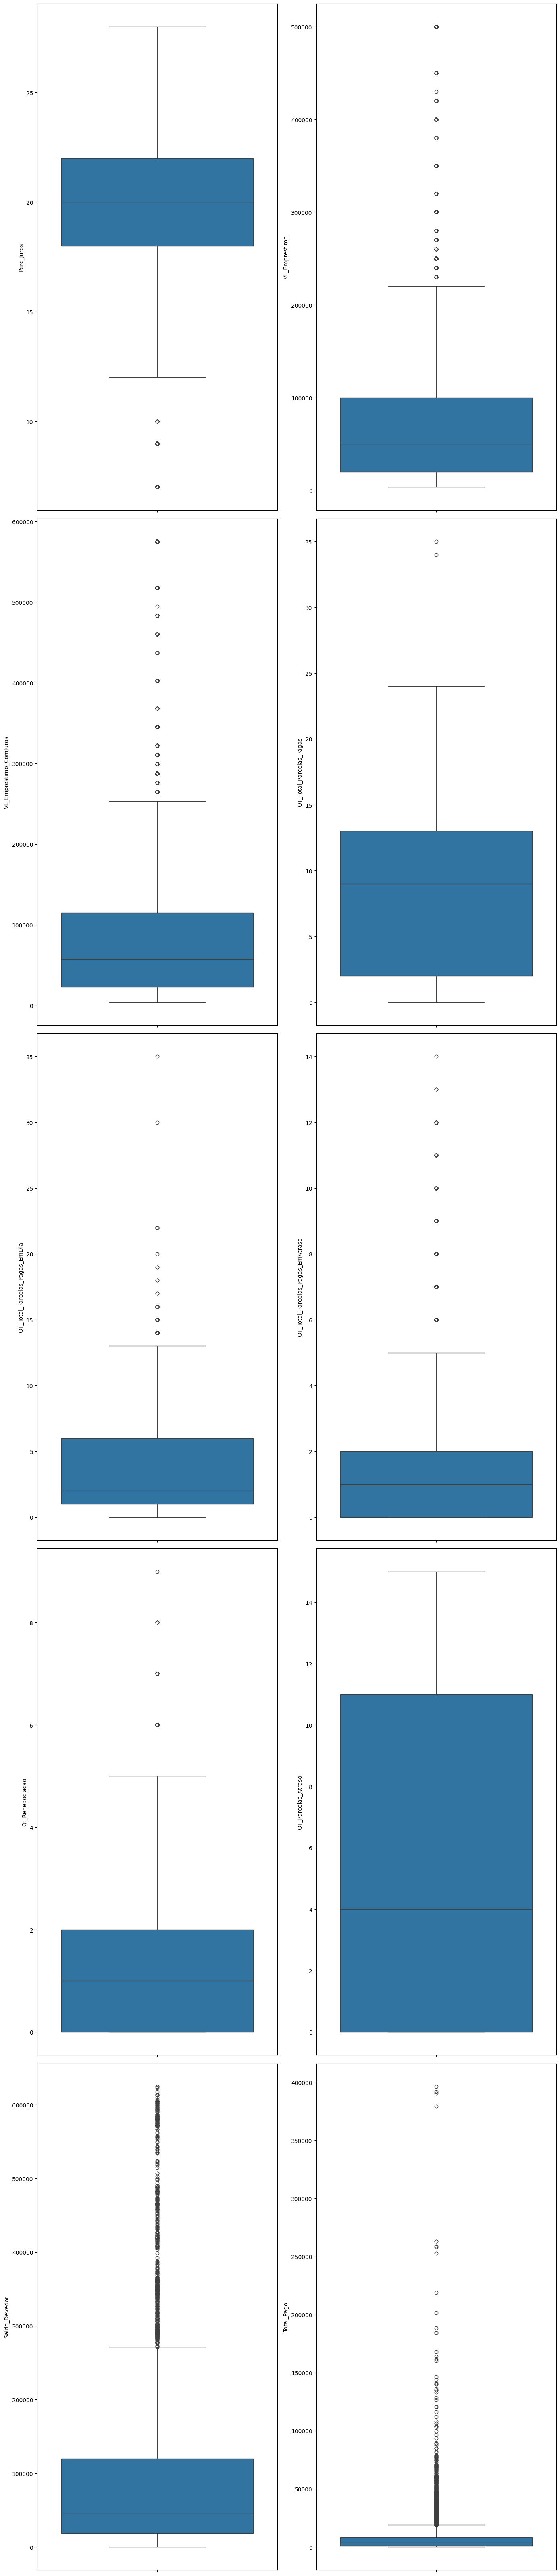

In [ ]:
plt.rcParams['figure.figsize'] = [14, 64]
plt.rcParams['figure.autolayout'] = True
f, axes = plt.subplots(5, 2)

linha = 0
coluna = 0

for i in variaveis_numericas:
  sns.boxplot(data=df2, y=i, ax=axes[linha, coluna])
  coluna += 1
  if coluna == 2:
    linha += 1
    coluna = 0
plt.show()

Carregamos as variaveis categoricas para fazer o OneHotEncoding

In [ ]:
variaveis_categoricas = []
for i in df2.columns[df2.columns != "Possivel_Fraude"].tolist():
  if df2.dtypes[i] == 'object' or df2.dtypes[i] == 'category':
    variaveis_categoricas.append(i)

Visualizamos as variáveis categoricas

In [ ]:
variaveis_categoricas

['Sexo',
 'UF_Cliente',
 'Estado_Civil',
 'Faixa_Etaria',
 'Faixa_Salarial',
 'Faixa_Dias_Atraso',
 'Faixa_Prazo_Emprestimo',
 'Faixa_Prazo_Restante']

Criamos o encoder e aplica OneHotEncoder

In [ ]:
lb = LabelEncoder()

for var in variaveis_categoricas:
  df2[var] = lb.fit_transform(df2[var])

Verificamos novamente para confirmar se após transformação surgiu algum valor nulo

In [ ]:
df2.isnull().sum()

,0
Sexo,0
UF_Cliente,0
Perc_Juros,0
VL_Emprestimo,0
VL_Emprestimo_ComJuros,0
QT_Total_Parcelas_Pagas,0
QT_Total_Parcelas_Pagas_EmDia,0
QT_Total_Parcelas_Pagas_EmAtraso,0
Qt_Renegociacao,0
Estado_Civil,0


In [ ]:
df2.head()

,Sexo,UF_Cliente,Perc_Juros,VL_Emprestimo,VL_Emprestimo_ComJuros,QT_Total_Parcelas_Pagas,QT_Total_Parcelas_Pagas_EmDia,QT_Total_Parcelas_Pagas_EmAtraso,Qt_Renegociacao,Estado_Civil,QT_Parcelas_Atraso,Saldo_Devedor,Total_Pago,Possivel_Fraude,Faixa_Etaria,Faixa_Salarial,Faixa_Dias_Atraso,Faixa_Prazo_Emprestimo,Faixa_Prazo_Restante
0,1,25,23.00,80000.00,92000.00,15,9,1,0,1,0,91759.97,7717.08,Nao,3,6,2,2,2
1,1,10,20.00,50000.00,57500.00,10,10,0,0,3,4,53981.18,6756.59,Nao,1,2,5,3,3
2,1,4,18.00,100000.00,115000.00,15,5,1,0,0,0,101150.02,17929.06,Nao,2,5,2,3,3
3,1,10,20.00,30000.00,34500.00,1,1,0,0,3,13,36208.10,369.10,Sim,0,2,6,3,3
4,1,10,20.00,60000.00,69000.00,16,16,0,0,0,0,60984.00,11845.24,Nao,4,4,2,3,3


Checamos o tipo das variáveis

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9517 entries, 0 to 9516
Data columns (total 19 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Sexo                              9517 non-null   int64  
 1   UF_Cliente                        9517 non-null   int64  
 2   Perc_Juros                        9517 non-null   float64
 3   VL_Emprestimo                     9517 non-null   float64
 4   VL_Emprestimo_ComJuros            9517 non-null   float64
 5   QT_Total_Parcelas_Pagas           9517 non-null   int64  
 6   QT_Total_Parcelas_Pagas_EmDia     9517 non-null   int64  
 7   QT_Total_Parcelas_Pagas_EmAtraso  9517 non-null   int64  
 8   Qt_Renegociacao                   9517 non-null   int64  
 9   Estado_Civil                      9517 non-null   int64  
 10  QT_Parcelas_Atraso                9517 non-null   int64  
 11  Saldo_Devedor                     9517 non-null   float64
 12  Total_

Visualizamos a quantidade da variável target para fazer o balanceamento

In [ ]:
variavel_target = df2.Possivel_Fraude.value_counts()
variavel_target

,count
Possivel_Fraude,
Nao,5035
Sim,4482


Separamos variaveis preditoras e target

In [ ]:
preditoras = df2.iloc [:, df2.columns != "Possivel_Fraude"]
target = df2.iloc[:, 13]

Visualizamos as variaveis preditoras e a target

In [ ]:
target.head()

,Possivel_Fraude
0,Nao
1,Nao
2,Nao
3,Sim
4,Nao


Seed para reproduzir o mesmo resultado
Criamos o balanceador SMOTE
Aplicamos o balanceador

In [ ]:
seed = 100
balanceador = SMOTE(random_state=seed)
preditoras_balanceadas, target_balanceado = balanceador.fit_resample(preditoras, target)

Visualizando o balanceamento da variável target



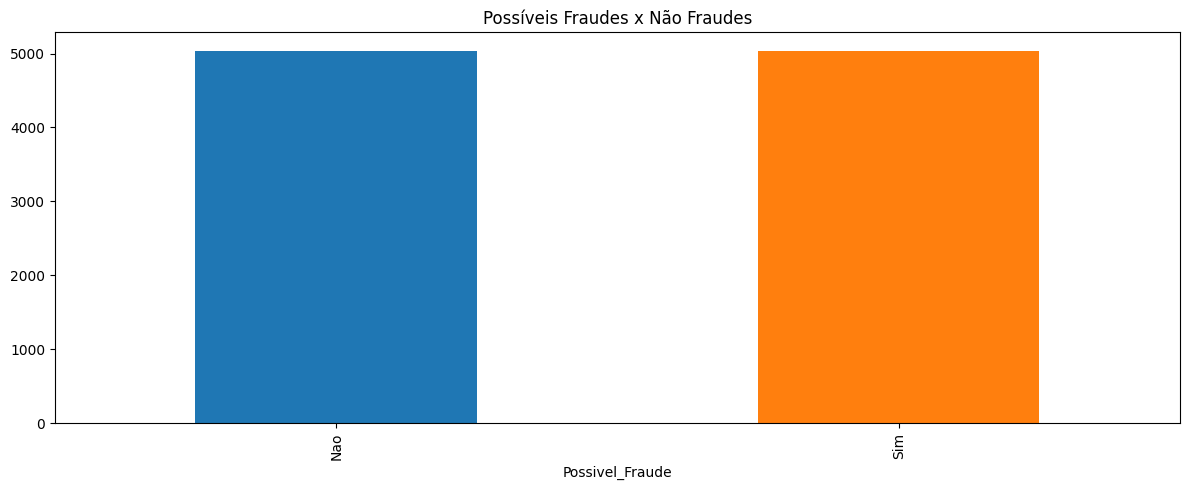

In [ ]:
plt.rcParams["figure.figsize"] = [12.00, 5.00]
plt.rcParams["figure.autolayout"] = True
target_balanceado.value_counts().plot(kind='bar', title='Possíveis Fraudes x Não Fraudes',color = ['#1F77B4', '#FF7F0E']);

Quantidade de registros antes do balanceamento

In [ ]:
preditoras.shape

(9517, 18)

In [ ]:
target.shape

(9517,)

Quantidade de registros após o balanceamento


In [ ]:
preditoras_balanceadas.shape

(10070, 18)

In [ ]:
target_balanceado.shape

(10070,)

Divisão dos Dados de Treino e Teste.



In [ ]:
X_treino, X_teste, Y_treino, Y_teste = train_test_split(preditoras_balanceadas, target_balanceado, test_size = 0.3, random_state = 42)

In [ ]:
X_treino.shape

(7049, 18)

In [ ]:
X_treino.head()

,Sexo,UF_Cliente,Perc_Juros,VL_Emprestimo,VL_Emprestimo_ComJuros,QT_Total_Parcelas_Pagas,QT_Total_Parcelas_Pagas_EmDia,QT_Total_Parcelas_Pagas_EmAtraso,Qt_Renegociacao,Estado_Civil,QT_Parcelas_Atraso,Saldo_Devedor,Total_Pago,Faixa_Etaria,Faixa_Salarial,Faixa_Dias_Atraso,Faixa_Prazo_Emprestimo,Faixa_Prazo_Restante
7012,0,17,19.00,500000.00,575000.00,1,1,0,1,4,12,600296.26,1942.30,4,6,2,2,0
8541,0,25,20.00,140000.00,161000.00,5,3,1,1,0,8,167073.02,2485.00,4,5,1,2,0
3903,0,4,28.00,12000.00,13800.00,1,1,0,0,0,13,15717.44,332.66,1,5,6,1,1
1844,0,25,18.00,50000.00,57500.00,13,5,3,5,3,0,13084.40,26422.41,0,2,2,1,1
8303,1,9,21.00,15000.00,17250.00,13,3,4,1,3,0,14096.18,4423.11,1,5,2,1,1


Normalização das variáveis

In [ ]:
Normalizador = MinMaxScaler()
X_treino_normalizados = Normalizador.fit_transform(X_treino)
X_teste_normalizados = Normalizador.transform(X_teste)

In [ ]:
X_treino_normalizados.shape

(7049, 18)

Visualizando os dados após a normalização

In [ ]:
X_treino_normalizados

array([[0.        , 0.65384615, 0.57142857, ..., 0.33333333, 0.66666667,
        0.        ],
       [0.        , 0.96153846, 0.61904762, ..., 0.16666667, 0.66666667,
        0.        ],
       [0.        , 0.15384615, 1.        , ..., 1.        , 0.33333333,
        0.33333333],
       ...,
       [1.        , 0.96153846, 0.71428571, ..., 0.33333333, 0.66666667,
        0.66666667],
       [1.        , 0.88461538, 0.57142857, ..., 0.83333333, 0.66666667,
        0.66666667],
       [1.        , 0.96153846, 0.85714286, ..., 0.33333333, 1.        ,
        1.        ]])

Padronizando as variáveis

In [ ]:
Padronizador = StandardScaler()
X_treino_padronizados = Padronizador.fit_transform(X_treino)
X_teste_padronizados = Padronizador.transform(X_teste)

Visualizando os dados após a padronização

In [ ]:
X_treino_padronizados

array([[-1.19681542,  0.23377851, -0.17570736, ..., -0.35426567,
        -0.0233426 , -1.76391462],
       [-1.19681542,  1.30021092,  0.08623913, ..., -0.98583338,
        -0.0233426 , -1.76391462],
       [-1.19681542, -1.49917416,  2.18181105, ...,  2.17200516,
        -1.17398585, -0.81635829],
       ...,
       [ 0.83555073,  1.30021092,  0.61013211, ..., -0.35426567,
        -0.0233426 ,  0.13119804],
       [ 0.83555073,  1.03360281, -0.17570736, ...,  1.54043746,
        -0.0233426 ,  0.13119804],
       [ 0.83555073,  1.30021092,  1.39597158, ..., -0.35426567,
         1.12730065,  1.07875437]])

### 5. Criando o modelo de machine learning usando o Random Forest

In [ ]:
randomForest = RandomForestClassifier()
randomForest.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [ ]:
n_estimators = np.array([100,200,300])
max_depth = np.array([10,20])
criterion = np.array(["gini", "entropy"])
max_features = np.array(["sqrt", "log2", None])
min_samples_split = np.array([1,2,5])
min_samples_leaf = np.array([1,2,3])

grid_parametros = dict(n_estimators = n_estimators,
                       max_depth = max_depth,
                       criterion = criterion,
                       max_features = max_features,
                       min_samples_split = min_samples_split,
                       min_samples_leaf = min_samples_leaf)


randomForest = GridSearchCV(randomForest, grid_parametros, cv = 3, n_jobs = 8)

inicio = time.time()
randomForest.fit(X_treino_normalizados, Y_treino)
fim = time.time()

treinos_rf = pd.DataFrame(randomForest.cv_results_)


print(f"Acurácia em Treinamento: {randomForest.best_score_ :.2%}")
print("")
print(f"Hiperparâmetros Ideais: {randomForest.best_params_}")
print("")
print("Tempo de Treinamento do Modelo: ", round(fim - inicio,2))
print("")
print("Numero de treinamentos realizados: ", treinos_rf.shape[0])

Acurácia em Treinamento: 99.23%

Hiperparâmetros Ideais: {'criterion': np.str_('entropy'), 'max_depth': np.int64(10), 'max_features': 'sqrt', 'min_samples_leaf': np.int64(1), 'min_samples_split': np.int64(5), 'n_estimators': np.int64(300)}

Tempo de Treinamento do Modelo:  828.05

Numero de treinamentos realizados:  324


In [ ]:
clf = RandomForestClassifier(n_estimators  = 100, criterion = 'entropy', max_depth = 20,
                             max_features = 'log2', min_samples_leaf = 1, min_samples_split = 12, n_jobs = 8)

clf = clf.fit(X_treino_normalizados, Y_treino)

Abaixo temos a importância de cada variável no modelo preditivo

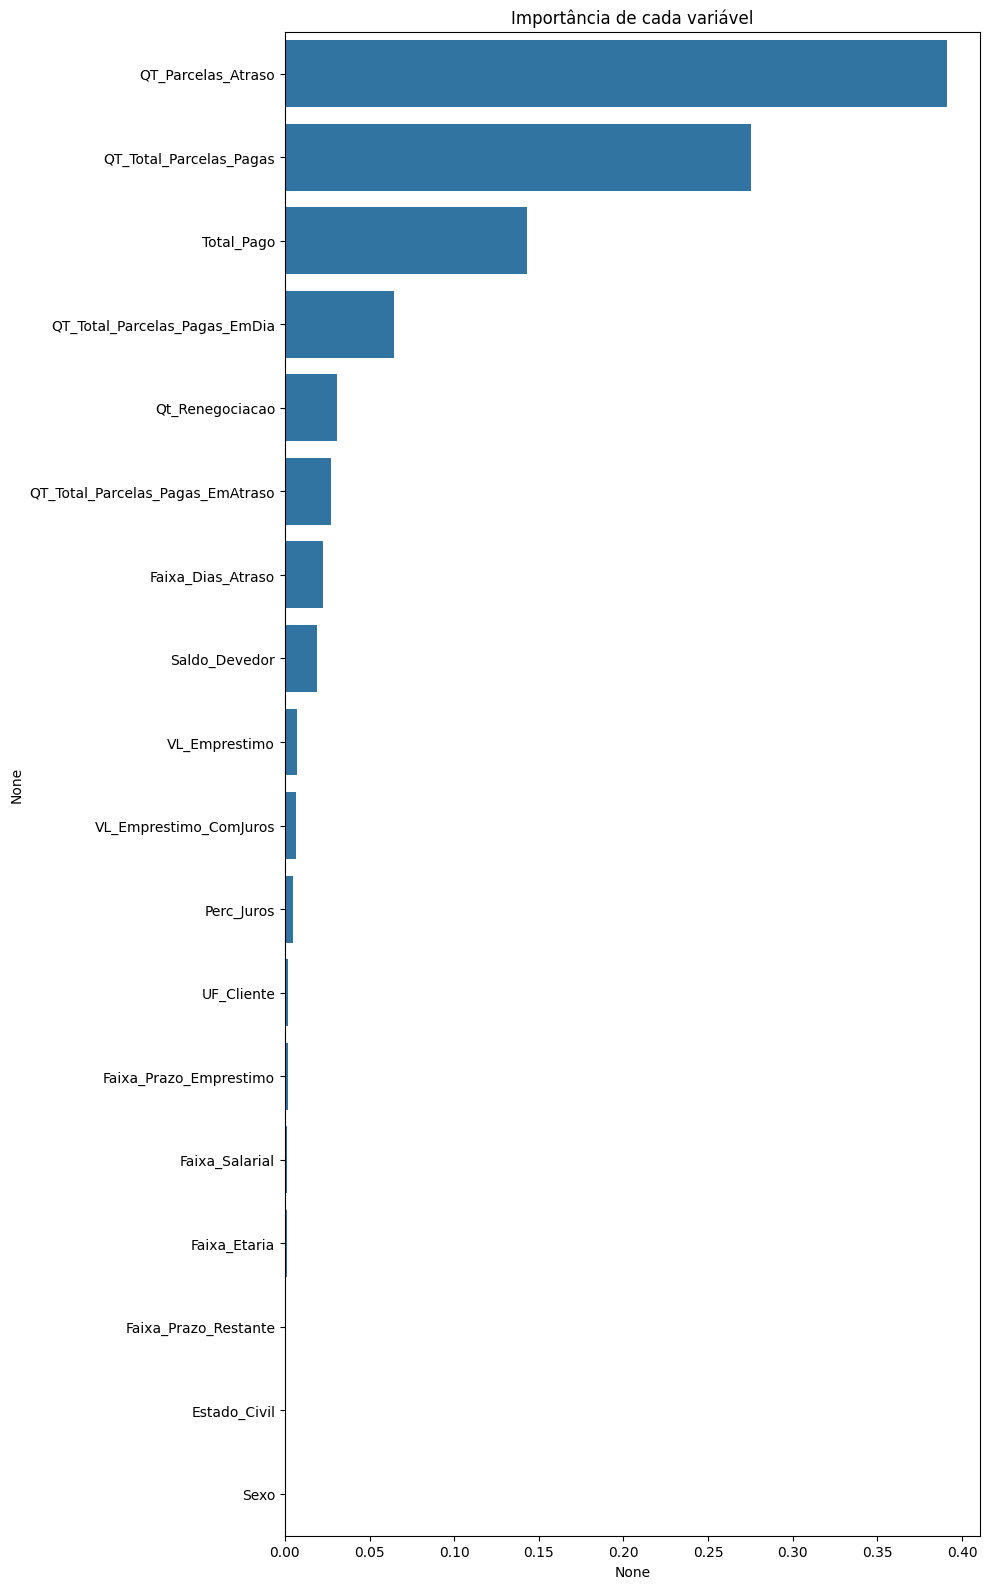

In [ ]:
plt.rcParams["figure.figsize"] = [10.00, 16.00]
plt.rcParams["figure.autolayout"] = True

importances = pd.Series(data=clf.feature_importances_, index=preditoras.columns)
importances = importances.sort_values(ascending = False)
sns.barplot(x=importances, y=importances.index, orient='h').set_title('Importância de cada variável')
plt.show()

Percentual de importância

In [ ]:
importances.sort_values(ascending = False)

,0
QT_Parcelas_Atraso,0.39
QT_Total_Parcelas_Pagas,0.28
Total_Pago,0.14
QT_Total_Parcelas_Pagas_EmDia,0.06
Qt_Renegociacao,0.03
QT_Total_Parcelas_Pagas_EmAtraso,0.03
Faixa_Dias_Atraso,0.02
Saldo_Devedor,0.02
VL_Emprestimo,0.01
VL_Emprestimo_ComJuros,0.01


In [ ]:
scores = clf.score(X_treino_normalizados,Y_treino)
scores

0.9971627181160448

In [ ]:
scores = clf.score(X_teste_normalizados,Y_teste)
scores

0.9894074809665674

In [ ]:
modelo_rf = {'Melhores Hiperparametros':randomForest.best_params_,
               'Numero de Modelos Treinados': treinos_rf.shape[0],
               'Melhor Score': str(round(randomForest.best_score_ * 100,2))+"%"}

In [ ]:
modelo_rf

{'Melhores Hiperparametros': {'criterion': np.str_('entropy'),
  'max_depth': np.int64(10),
  'max_features': 'sqrt',
  'min_samples_leaf': np.int64(1),
  'min_samples_split': np.int64(5),
  'n_estimators': np.int64(300)},
 'Numero de Modelos Treinados': 324,
 'Melhor Score': '99.23%'}

### 6. Criando o modelo de machine learning usando o SVM

In [ ]:
modelo_svm = SVC()
modelo_svm.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [ ]:
grid_parametros = {'C': [0.1,1,10,100],
                   'gamma': [1,0.1,0.01,0.001],
                   'degree' : [2,3,4,],
                   'coef0' : [0.5,1],
                   'max_iter': [-1, 1]}


svm = GridSearchCV(modelo_svm, grid_parametros, n_jobs = 8)

inicio = time.time()
svm.fit(X_treino_normalizados, Y_treino)
fim = time.time()

treinos_svm = pd.DataFrame(svm.cv_results_)

print(f"Acurácia em Treinamento: {svm.best_score_ :.2%}")
print("")
print(f"Hiperparâmetros Ideais: {svm.best_params_}")
print("")
print("Tempo de Treinamento do Modelo: ", round(fim - inicio,2))
print("")
print("Numero de treinamentos realizados: ", treinos_svm.shape[0])

Acurácia em Treinamento: 98.82%

Hiperparâmetros Ideais: {'C': 100, 'coef0': 0.5, 'degree': 2, 'gamma': 0.01, 'max_iter': -1}

Tempo de Treinamento do Modelo:  295.57

Numero de treinamentos realizados:  192


In [ ]:
modelo_svm = {'Melhores Hiperparametros':svm.best_params_,
               'Numero de Modelos Treinados': treinos_svm.shape[0],
               'Melhor Score': str(round(svm.best_score_ * 100,2))+"%"}

### 7. Criando o modelo de machine learning usando o KNN

In [ ]:
knn = KNeighborsClassifier()
knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [ ]:
n_neighbors = np.array([3,4,5,6,7])
algorithm = np.array(['auto', 'ball_tree', 'kd_tree', 'brute'])
leaf_size = np.array([30,31,32])
metric =  np.array(['minkowski','euclidean'])

grid_parametros = dict(n_neighbors = n_neighbors,
                       algorithm = algorithm,
                       leaf_size = leaf_size,
                       metric = metric)

knn = GridSearchCV(knn, grid_parametros, n_jobs = 8)

inicio = time.time()
knn.fit(X_treino_normalizados, Y_treino)
fim = time.time()

treinos_knn = pd.DataFrame(knn.cv_results_)

print(f"Acurácia em Treinamento: {knn.best_score_ :.2%}")
print("")
print(f"Hiperparâmetros Ideais: {knn.best_params_}")
print("")
print("Tempo de Treinamento do Modelo: ", round(fim - inicio,2))
print("")
print("Numero de treinamentos realizados: ", treinos_knn.shape[0])

Acurácia em Treinamento: 97.04%

Hiperparâmetros Ideais: {'algorithm': np.str_('auto'), 'leaf_size': np.int64(30), 'metric': np.str_('minkowski'), 'n_neighbors': np.int64(5)}

Tempo de Treinamento do Modelo:  123.92

Numero de treinamentos realizados:  120


In [ ]:
modelo_knn = {'Melhores Hiperparametros':knn.best_params_,
               'Numero de Modelos Treinados': treinos_knn.shape[0],
               'Melhor Score': str(round(knn.best_score_ * 100,2))+"%"}

### 8. Gerando o DataFrame com todos os valores de todos os modelos treinados

In [ ]:
resumo = pd.DataFrame({'Random Forest':pd.Series(modelo_rf),
                       'SVM':pd.Series(modelo_svm),
                       'KNN':pd.Series(modelo_knn)})

In [ ]:
resumo

,Random Forest,SVM,KNN
Melhores Hiperparametros,"{'criterion': 'entropy', 'max_depth': 10, 'max...","{'C': 100, 'coef0': 0.5, 'degree': 2, 'gamma':...","{'algorithm': 'auto', 'leaf_size': 30, 'metric..."
Numero de Modelos Treinados,324,192,120
Melhor Score,99.23%,98.82%,97.04%
